# Task
crop the item list part using line detection  
![Shoping Cash](./test_imgs/shop_invoice.png)

In [1]:
import cv2
import matplotlib.pyplot as plt
from os import getcwd

# Read image in Gray Scale

Sucess


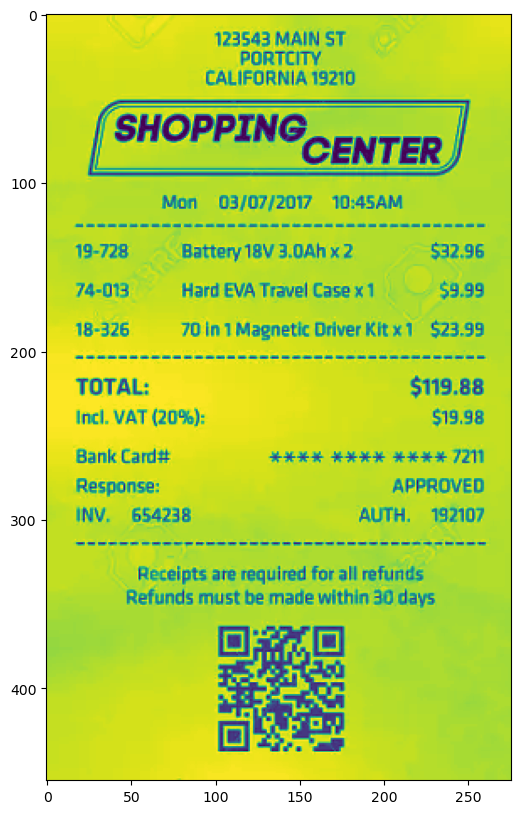

In [30]:
root_path = getcwd()
img_path = root_path+r"/test_imgs/shop_invoice.png"
img = cv2.imread(img_path,0) # Read image in gray scale

if img is not None:
    print('Sucess')
    plt.figure(figsize=(6,10))
    plt.imshow(img)
else:
    print('File not Found')

# Blur

In [51]:
ksize = (3,3)
blur_img = cv2.blur(img,ksize)
bilateral_filtering = cv2.bilateralFilter(img,9,75,75)
gaussian_blur_img = cv2.GaussianBlur(img,ksize,0)
median_img = cv2.medianBlur(img,ksize[0])



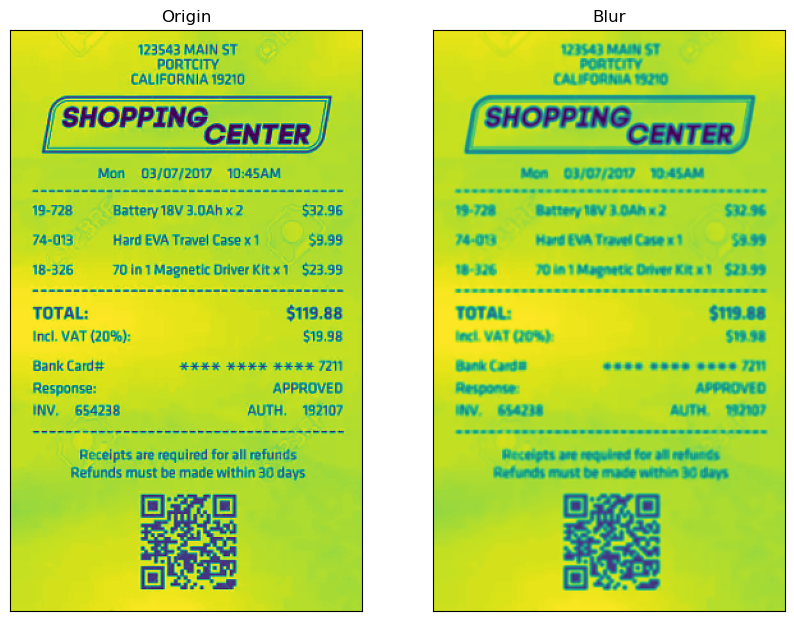

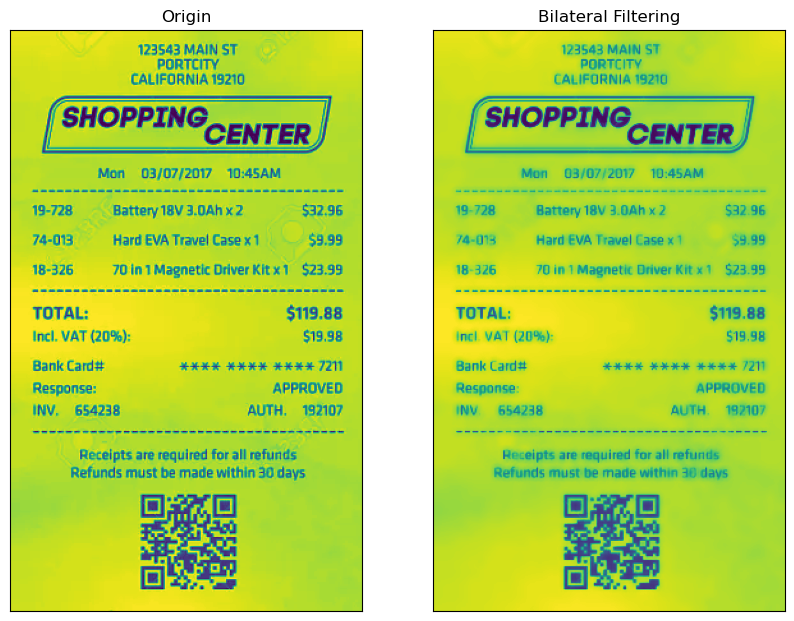

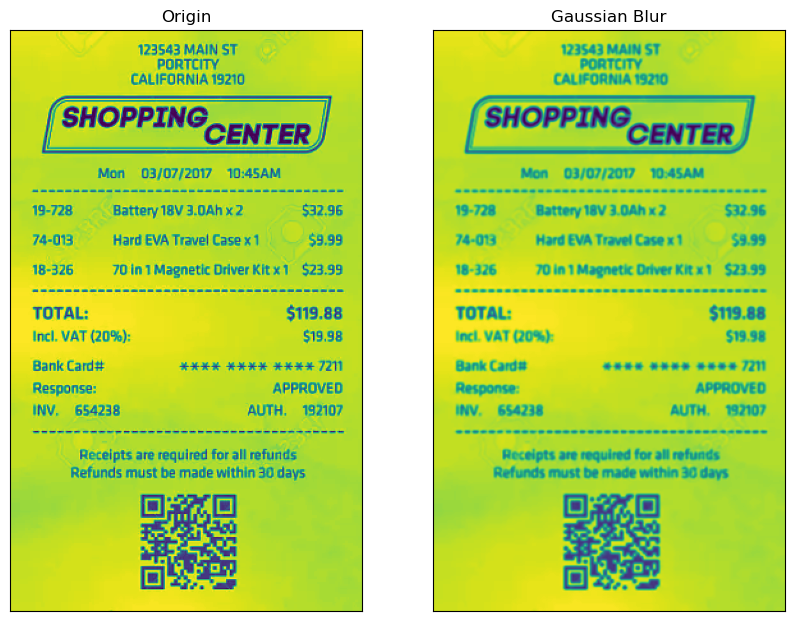

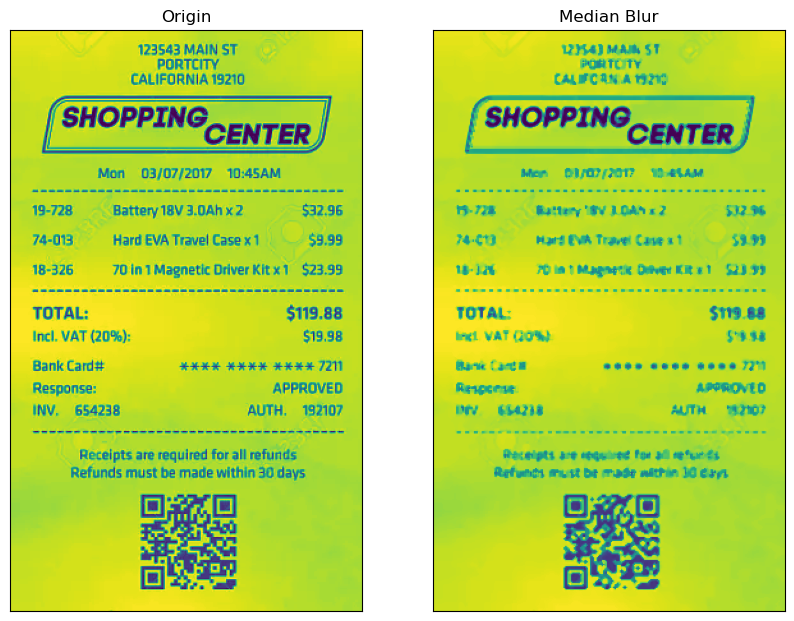

In [80]:
blur_img_list = [blur_img,bilateral_filtering,gaussian_blur_img,median_img]
title_list = ['Blur','Bilateral Filtering','Gaussian Blur','Median Blur']

for i,title in zip(blur_img_list,title_list):
    fig = plt.figure(figsize=(10,8))
    plt.subplot(121),plt.imshow(img),plt.title('Origin')
    plt.xticks([]),plt.yticks([])

    plt.subplot(122),plt.imshow(i),plt.title(title)
    plt.xticks([]),plt.yticks([])

    #plt.savefig(f"./out_img/Origin_vs_{title}.png")

# Threadshow

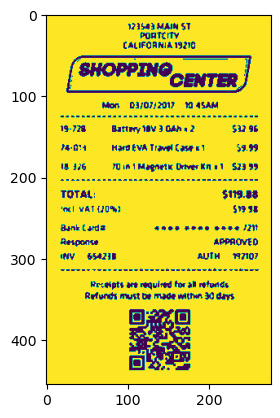

In [81]:
thresh_methods = [cv2.THRESH_BINARY,
           cv2.THRESH_BINARY_INV,
           cv2.THRESH_TRUNC,
           cv2.THRESH_TOZERO,
           cv2.THRESH_TOZERO_INV]

ret,thresh_img = cv2.threshold(blur_img_list[2],170,255,thresh_methods[0])
plt.imshow(thresh_img)

# Adaptive Thresh

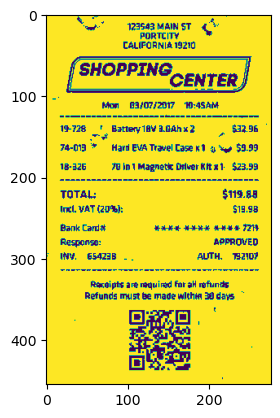

In [84]:
adaptive_methods = [cv2.ADAPTIVE_THRESH_MEAN_C,cv2.ADAPTIVE_THRESH_GAUSSIAN_C]
adaptive_thresh_img = cv2.adaptiveThreshold(blur_img_list[1],255,
                                            adaptive_methods[0],
                                            thresh_methods[0],11,2)
plt.imshow(adaptive_thresh_img)

# Canny Edge Detection

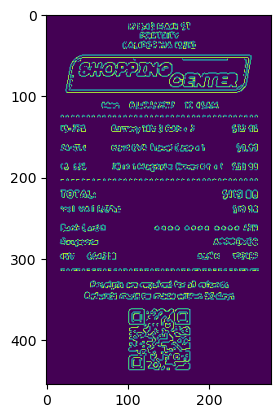

In [90]:
canny_img = cv2.Canny(thresh_img,100,200)
plt.imshow(canny_img)

# Line Detection

In [92]:
import numpy as np

lines = cv2.HoughLines(canny_img,1,np.pi/180,150,None,0,0)
print(len(lines))
print(lines)

4
[[[96.         1.5707964]]

 [[93.         1.5707964]]

 [[53.         1.5707964]]

 [[50.         1.5707964]]]


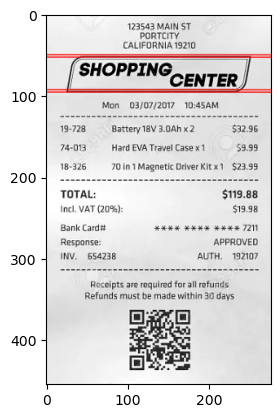

In [102]:
import math
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
for i in range(0,len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a*rho
    y0 = b*rho
    pt1 = (int(x0 + 1000*(-b)), int(y0+1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0-1000*(a)))

    cv2.line(img_copy,pt1,pt2,(255,0,0),1,cv2.LINE_AA)
plt.imshow(img_copy)

3


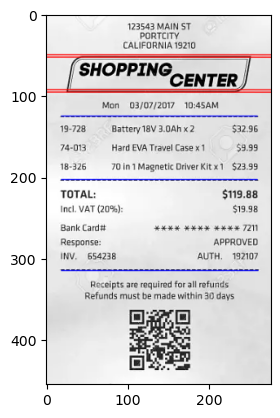

In [123]:
linesP = cv2.HoughLinesP(canny_img,1,np.pi/180,50,None,220,3)

img_copy_p = np.copy(img_copy)
print(len(linesP))
for i in range(0,len(linesP)):
    l= linesP[i][0]
    cv2.line(img_copy_p,(l[0],l[1]),(l[2],l[3]),(0,0,255),1,cv2.LINE_AA)
    plt.imshow(img_copy_p)

In [124]:
print(linesP)

[[[ 18 125 259 125]]

 [[ 18 203 259 203]]

 [[ 18 315 260 315]]]


In [125]:
linesP[0][0][1]

125

In [127]:
linesP = sorted(linesP,key=lambda x:x[0][1])

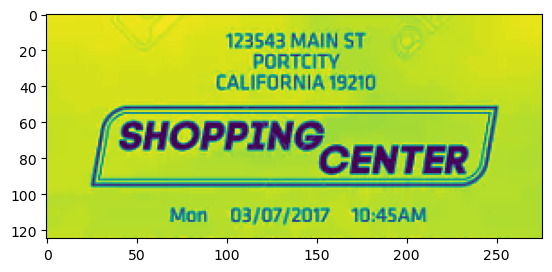

In [132]:
first_line = linesP[0][0]
first_img = img[0:first_line[1],:]
plt.imshow(first_img)

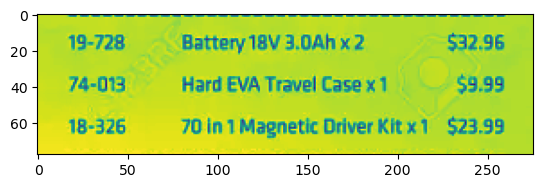

In [133]:
second_line = linesP[1][0]
second_img = img[first_line[1]:second_line[1],:]
plt.imshow(second_img)

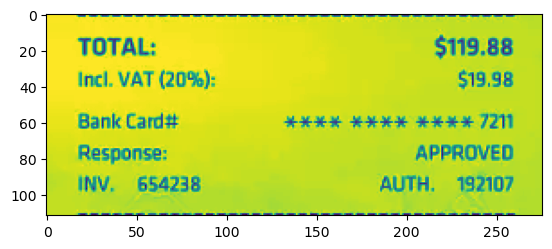

In [134]:
third_line = linesP[2][0]
third_img = img[second_line[1]:third_line[1],:]
plt.imshow(third_img)